In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import functions.handy_functions as hf
import functions.parse_data as parse

from sklearn.decomposition import PCA

2024-04-15 06:52:09.376521: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 06:52:09.410607: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 06:52:09.410625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 06:52:09.411523: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 06:52:09.417305: I tensorflow/core/platform/cpu_feature_guar

In [2]:

data_clear=parse.parse('cloudrm2_clear_newsurf.dat')
data_ice=parse.parse('cloudrm2_ice_newsurf.dat')
data_mixed=parse.parse('cloudrm2_mixed_newsurf.dat')
data_water=parse.parse('cloudrm2_water_newsurf.dat')

data_all=pd.concat([data_water,data_mixed,data_ice])
data_all=data_all.drop(columns=['Cloud_B01','Clear_B01'])

data_all=hf.dumb_down_surface(data_all) #Create simpler labels for surface descriptio 

In [3]:
data_ice

,Cloud_B01,Cloud_B02,Cloud_B03,Cloud_B04,Cloud_B05,Cloud_B06,Cloud_B07,Cloud_B08,Cloud_B09,Cloud_B10,...,Clear_B13,Sat_Zenith_Angle,Sun_Zenith_Angle,Azimuth_Diff_Angle,COT,Cloud_Type,Profile_ID,GOT,Water_Vapor,Surface_Desc
0,0.66662,0.65066,0.59447,0.63031,0.65021,0.65580,0.65694,0.65751,0.65798,0.64733,...,0.05248,14.89,71.44,176.68,19.885,6,3838,0.119,0.60,water-tapwater-none
1,0.61232,0.60804,0.58629,0.62634,0.63954,0.69052,0.73692,0.71180,0.80953,0.40407,...,0.68986,14.88,36.57,98.97,11.533,6,5329,0.129,3.27,water-tapwater-none
2,0.40966,0.41717,0.43758,0.45193,0.52924,0.75986,0.82356,0.80820,0.83367,0.53852,...,0.35647,14.59,31.47,6.58,5.225,6,9443,0.124,0.23,water-tapwater-none
3,0.39421,0.38661,0.38033,0.43169,0.44984,0.51292,0.58134,0.56890,0.69068,0.20647,...,0.73307,9.16,51.22,3.51,3.483,6,5561,0.127,3.74,water-tapwater-none
4,0.81797,0.81038,0.76962,0.81815,0.82329,0.85074,0.88109,0.83456,0.91085,0.61327,...,0.75064,12.78,55.12,96.89,38.042,6,5320,0.126,4.30,water-tapwater-none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.69015,0.66462,0.58542,0.63783,0.66944,0.68592,0.69642,0.70524,0.72189,0.67168,...,0.71484,10.31,77.98,5.11,38.926,6,1055,0.121,0.44,water-frost-none
49996,0.68838,0.68853,0.66517,0.76593,0.79693,0.88779,0.95427,0.86097,0.97415,0.41198,...,0.70739,8.70,48.43,72.31,14.961,6,7756,0.128,2.10,water-frost-none
49997,0.75564,0.75656,0.73900,0.78443,0.80501,0.90314,0.96950,0.86855,0.99381,0.59429,...,0.78590,7.67,34.46,65.16,22.369,6,5992,0.127,2.92,water-frost-none
49998,0.43948,0.45460,0.50606,0.49296,0.64494,0.91264,0.93002,0.87958,0.94430,0.42932,...,0.66462,10.23,62.45,152.54,3.894,6,346,0.126,0.78,water-frost-none


In [4]:
data_all.Surface_Desc.value_counts()

Surface_Desc
water-frost-none             25520
water-ice-none               25500
water-snow-finegranular      24980
water-snow-mediumgranular    24780
water-tapwater-none          24740
water-snow-coarsegranular    24480
Name: count, dtype: int64

In [5]:
data_all.Surface_Desc_Dumb.value_counts()

Surface_Desc_Dumb
water    150000
Name: count, dtype: int64

In [6]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc',
       'Surface_Desc_Dumb'],
      dtype='object')

(array([4.9450e+03, 3.0000e+01, 3.0000e+01, 4.2900e+02, 3.9190e+03,
        9.3750e+03, 1.8975e+04, 2.6972e+04, 3.1621e+04, 5.3704e+04]),
 array([0.0372  , 0.131118, 0.225036, 0.318954, 0.412872, 0.50679 ,
        0.600708, 0.694626, 0.788544, 0.882462, 0.97638 ]),
 <BarContainer object of 10 artists>)

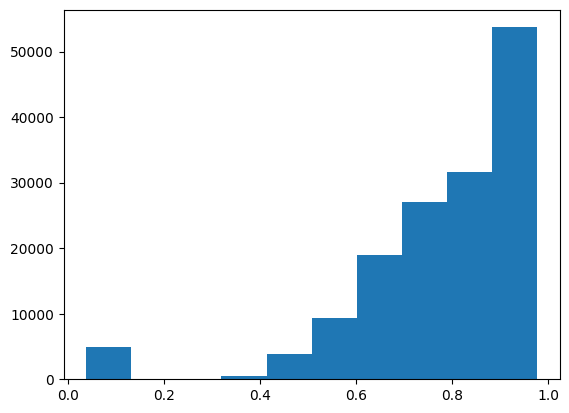

In [7]:
plt.hist(data_all['Clear_B12'])

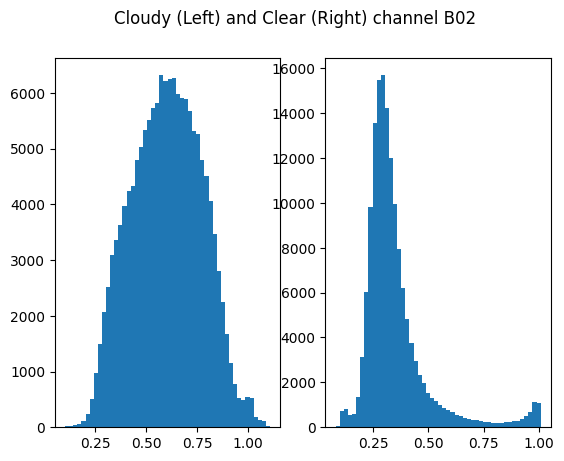

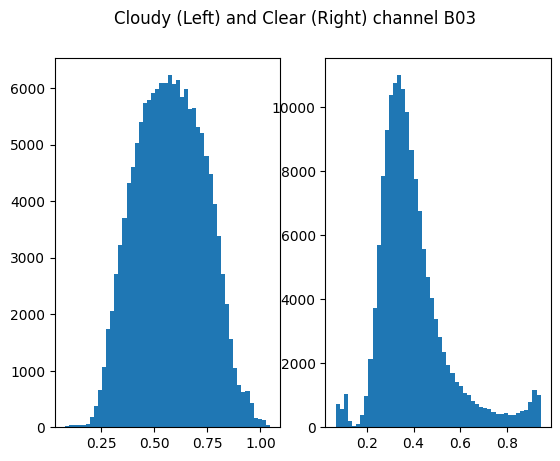

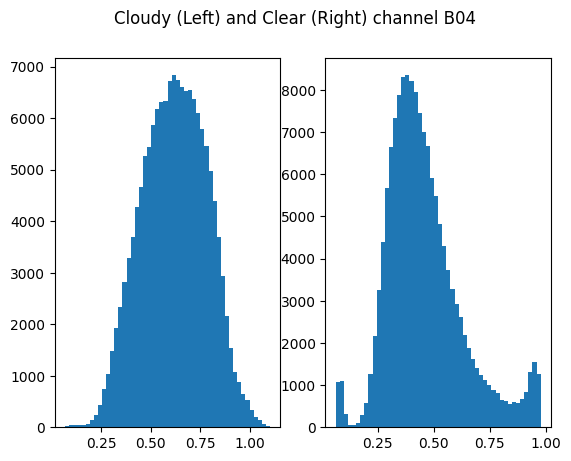

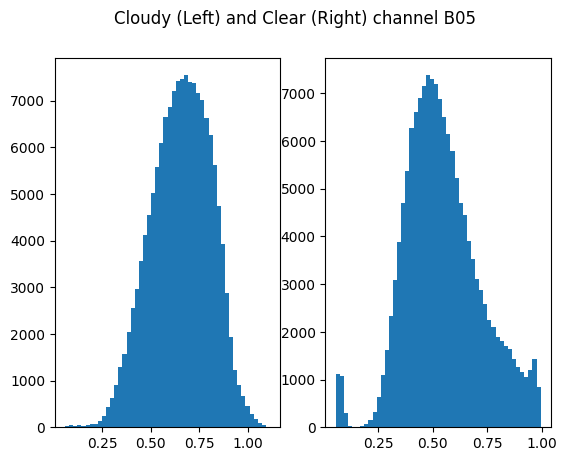

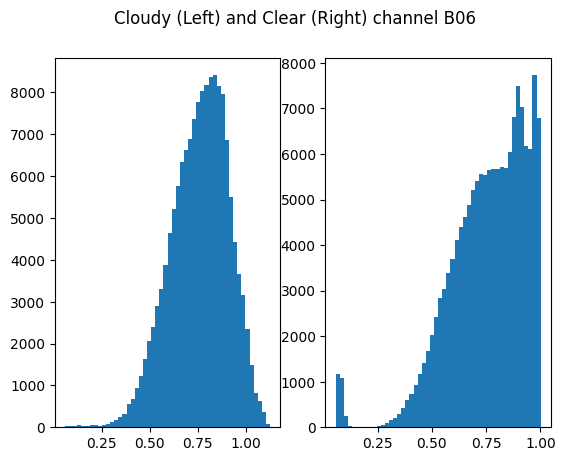

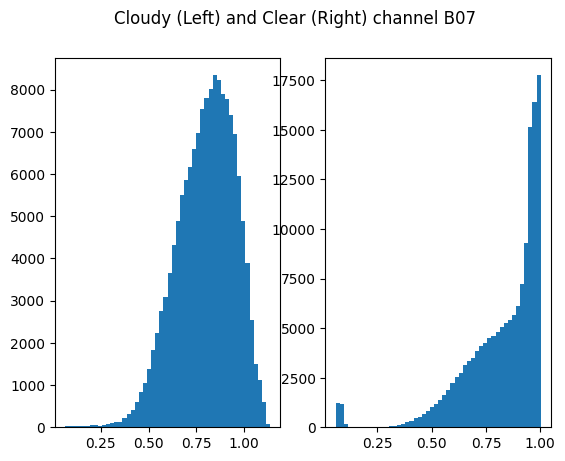

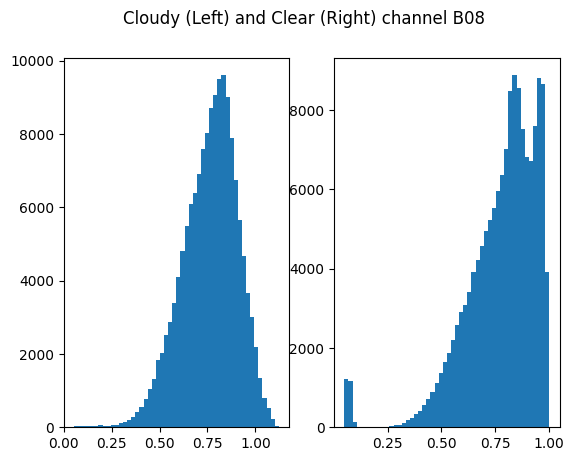

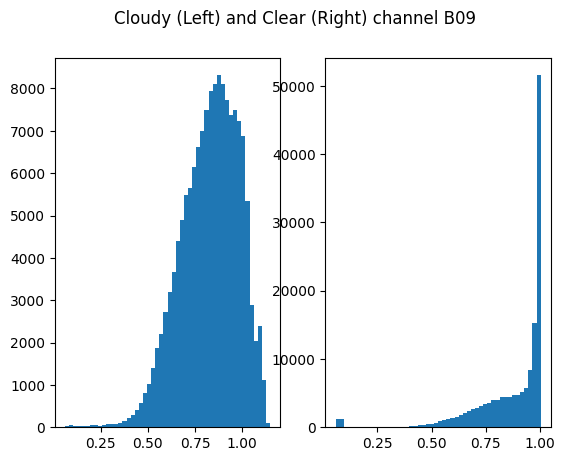

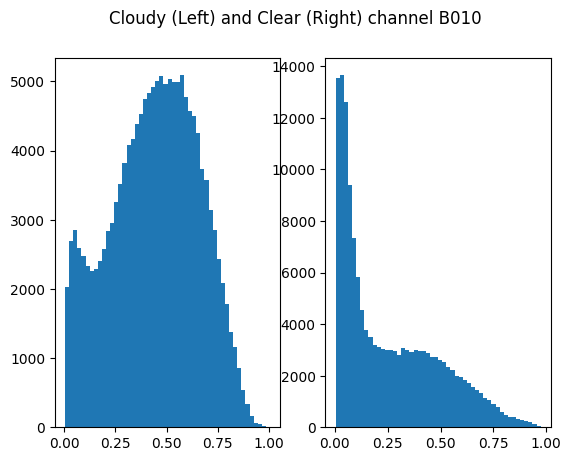

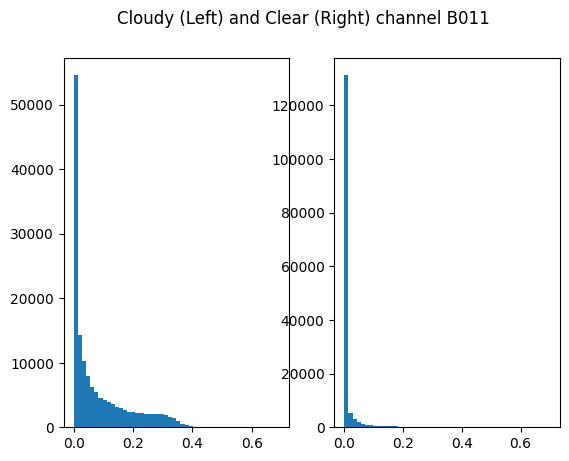

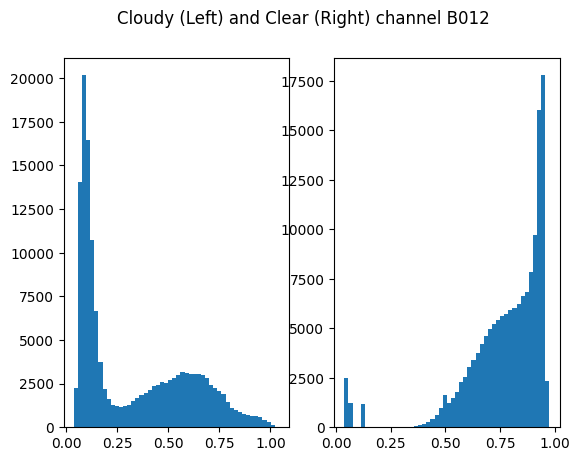

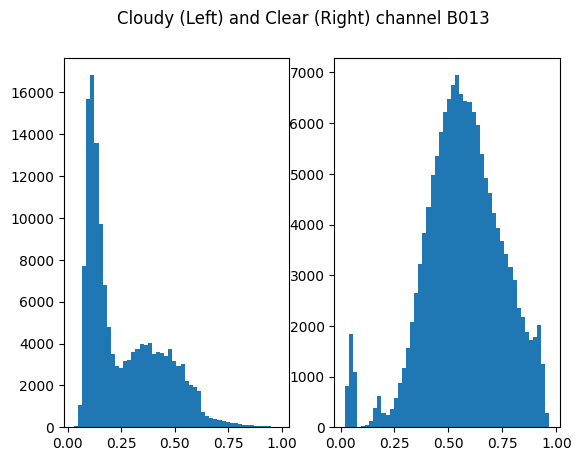

In [8]:
for i in range(2,14):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Cloudy (Left) and Clear (Right) channel B0"+str(i))
    if i<=9:
        ax1.hist(data_all['Cloud_'+'B0'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B0'+str(i)],bins=50)
    else:
        ax1.hist(data_all['Cloud_'+'B'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B'+str(i)],bins=50)

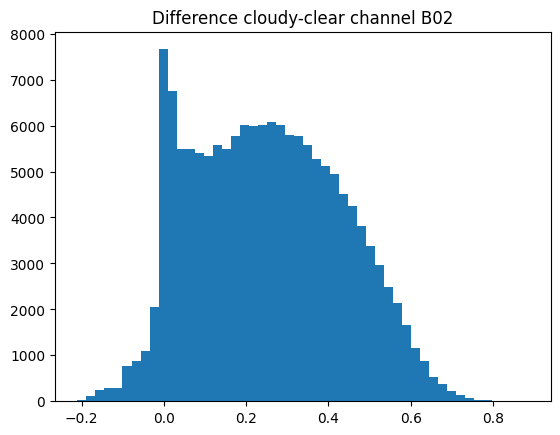

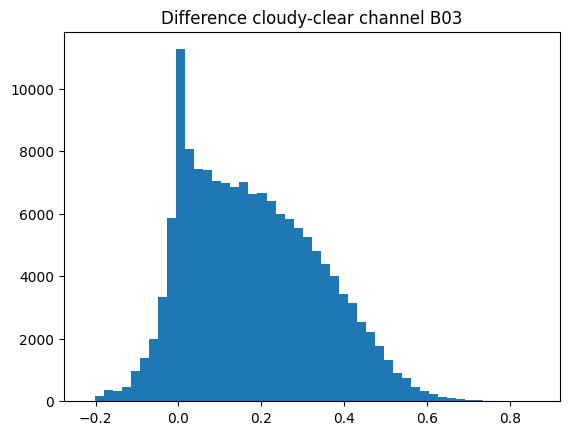

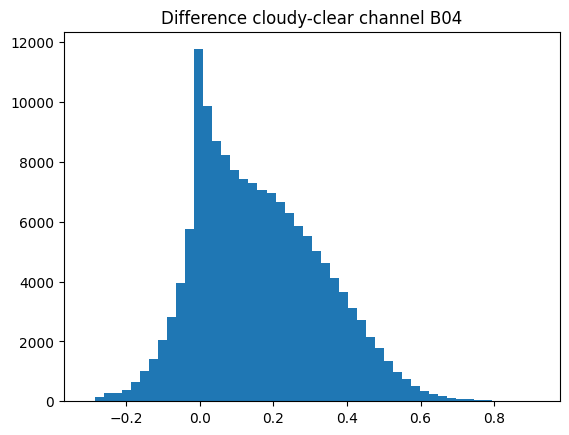

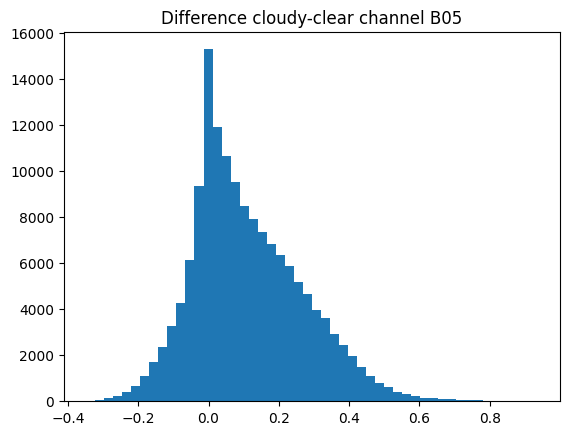

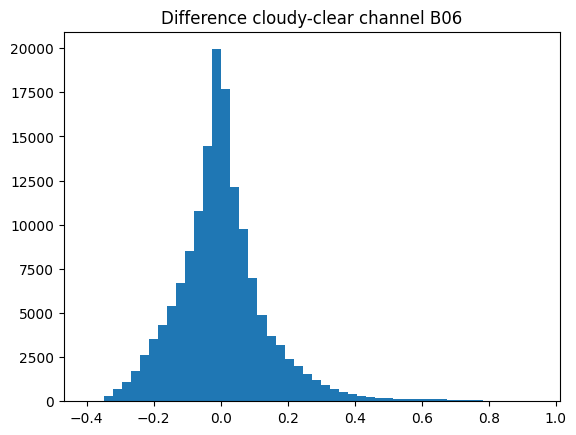

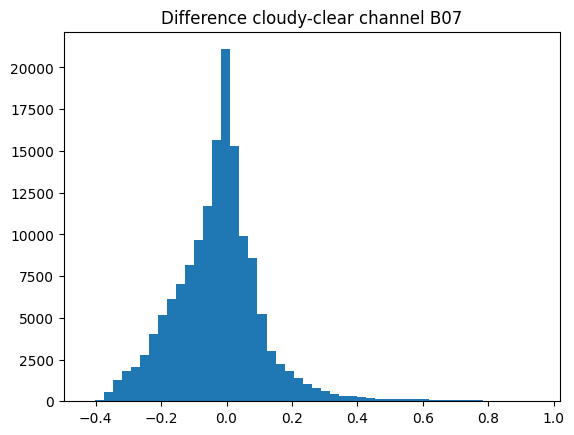

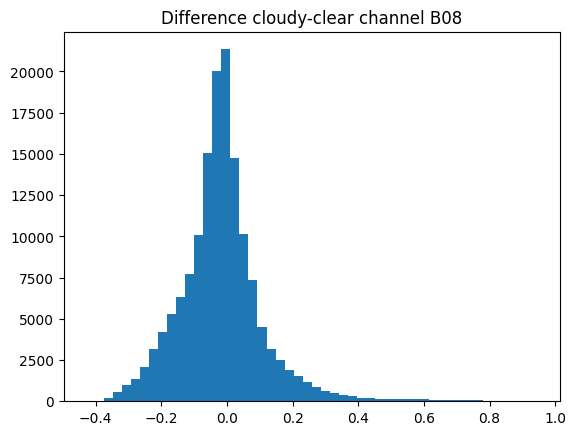

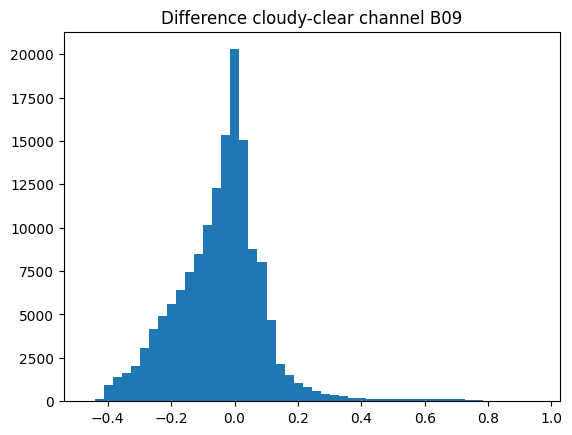

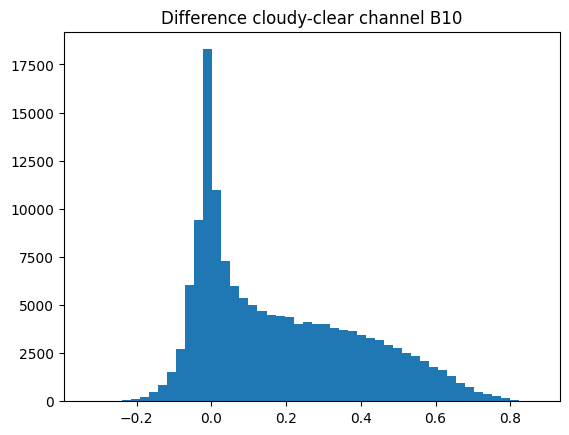

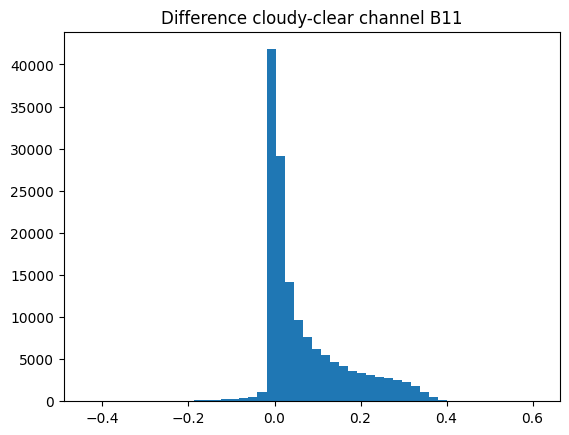

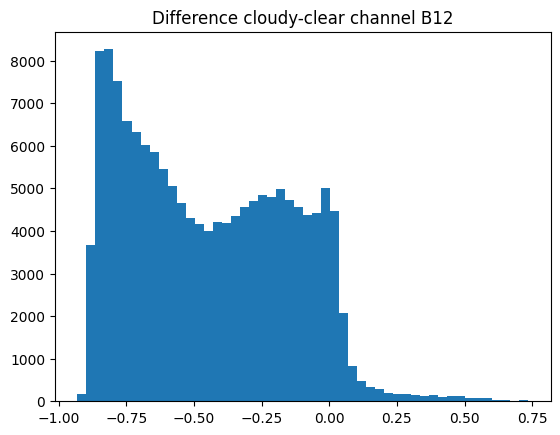

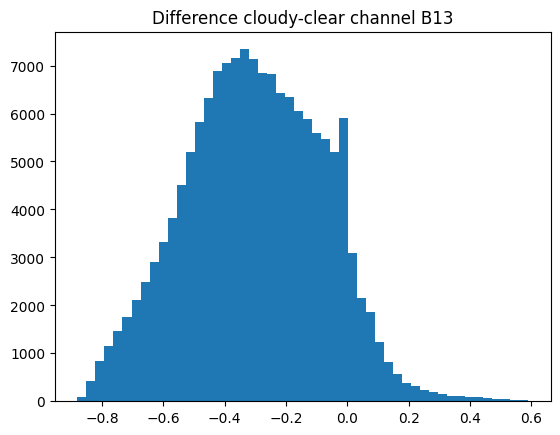

In [9]:
for i in range(2,14):
    
    if i<=9:
        plt.hist(data_all['Cloud_'+'B0'+str(i)]-data_all['Clear_'+'B0'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B0"+str(i))
        plt.show()
    else:
        plt.hist(data_all['Cloud_'+'B'+str(i)]-data_all['Clear_'+'B'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B"+str(i))
        plt.show()

## Histograms divided by surface description

In [15]:
data_all.Surface_Desc.value_counts()

Surface_Desc
water-frost-none             25520
water-ice-none               25500
water-snow-finegranular      24980
water-snow-mediumgranular    24780
water-tapwater-none          24740
water-snow-coarsegranular    24480
Name: count, dtype: int64

TypeError: 'Axes' object is not subscriptable

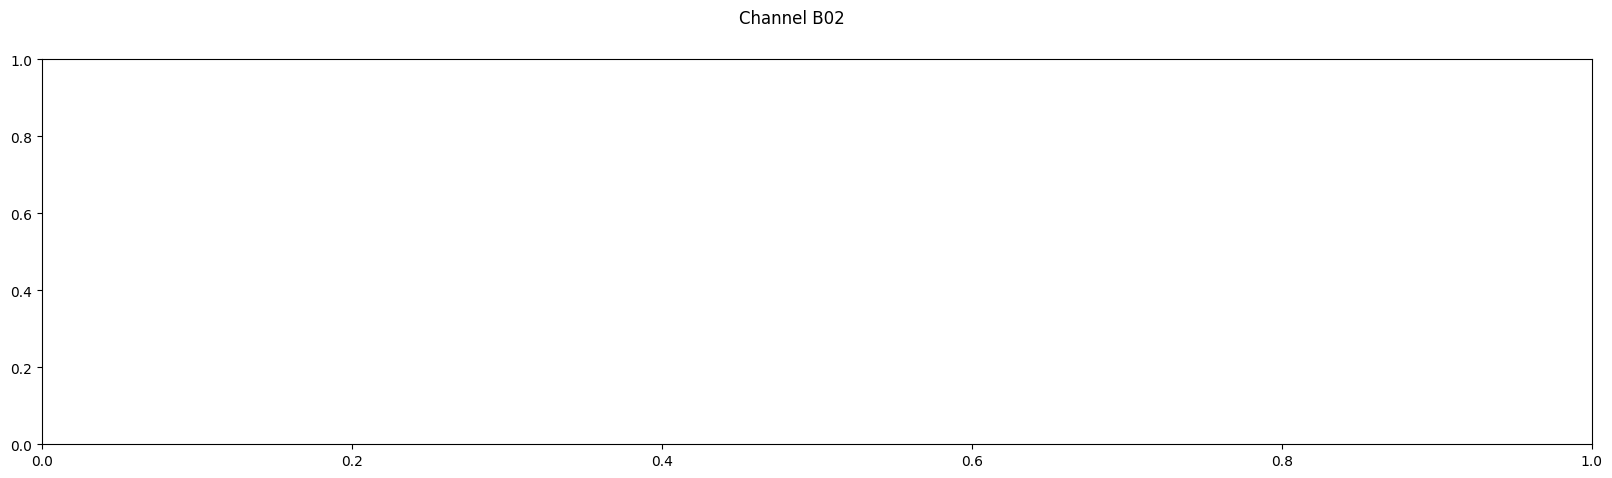

In [10]:
surface_labels=data_all.Surface_Desc_Dumb.unique()
plt.rcParams["figure.figsize"] = [20, 5]
for i in range(2,14):
    fig, axs = plt.subplots(1,len(surface_labels))
    
    if i<=9:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B0'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

    else:
        fig.suptitle("Channel B0"+str(i))
        for j,label in enumerate(surface_labels):
            df_tmp=data_all[data_all['Surface_Desc_Dumb']==label]

            axs[j].hist(df_tmp['Cloud_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].hist(df_tmp['Clear_'+'B'+str(i)],bins=50,alpha=0.9)
            axs[j].title.set_text('Surface type: '+label)
            axs[j].legend(['Cloudy','Clear'])

In [ ]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc',
       'Surface_Desc_Dumb'],
      dtype='object')

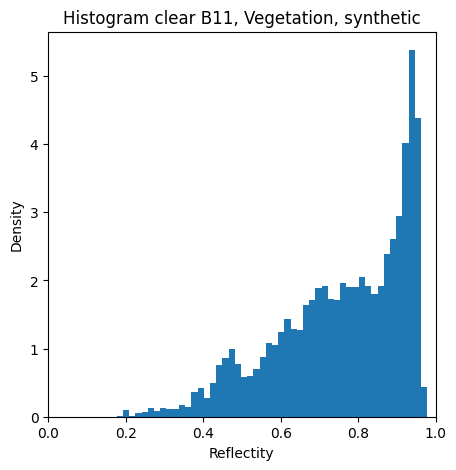

In [ ]:
df_tmp=data_all.loc[data_all['Surface_Desc_Dumb']=='vegetation']
plt.rcParams["figure.figsize"] = [5, 5]
plt.hist(df_tmp['Clear_B12'],bins=50,density=True)
plt.xlim([0,1])
plt.title('Histogram clear B11, Vegetation, synthetic')
plt.xlabel('Reflectity')
plt.ylabel('Density')
plt.show()

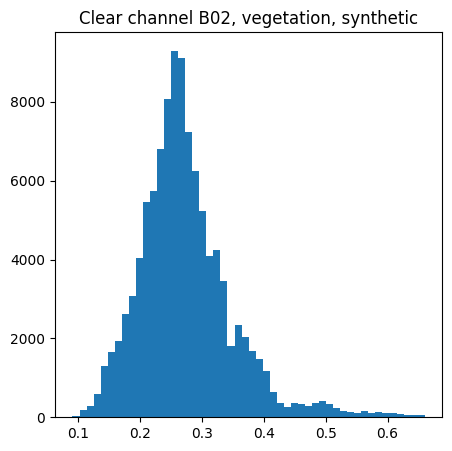

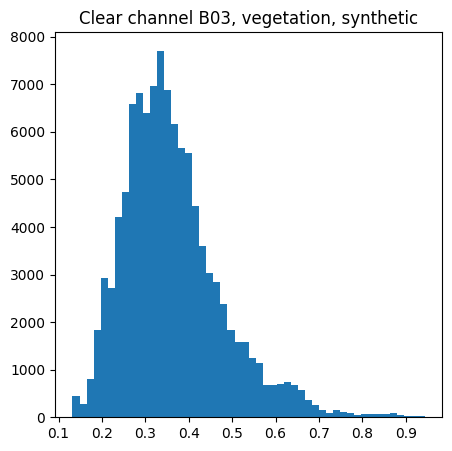

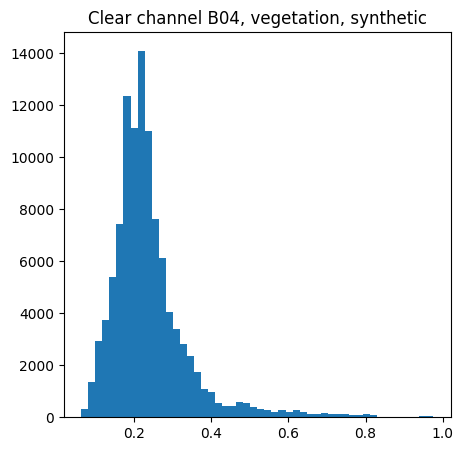

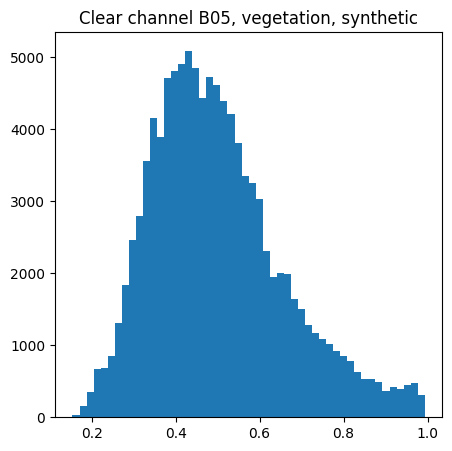

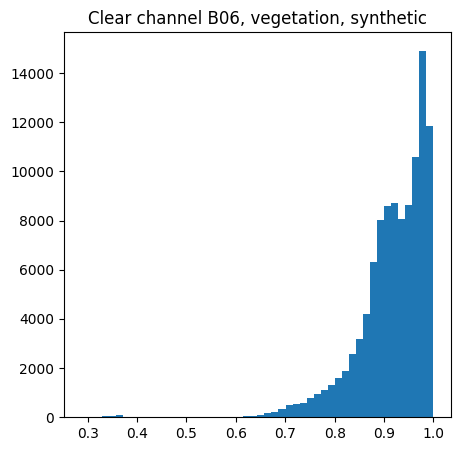

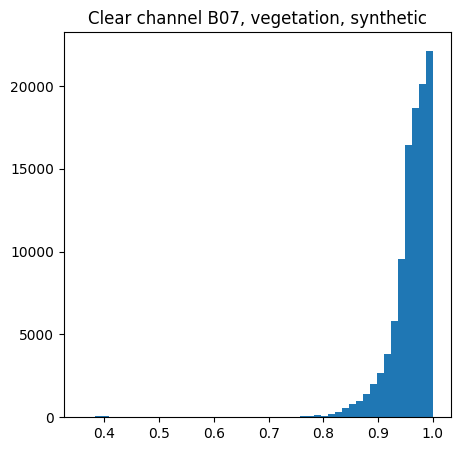

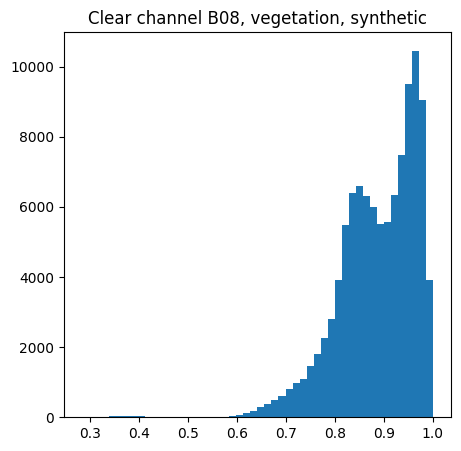

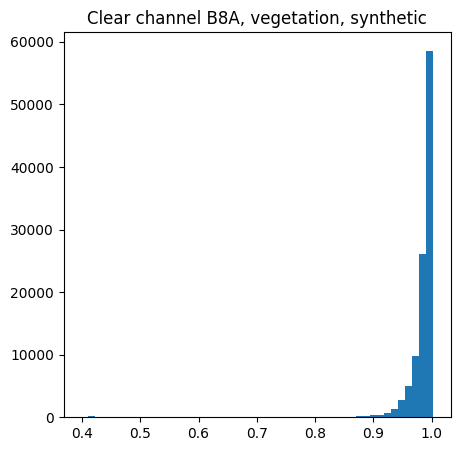

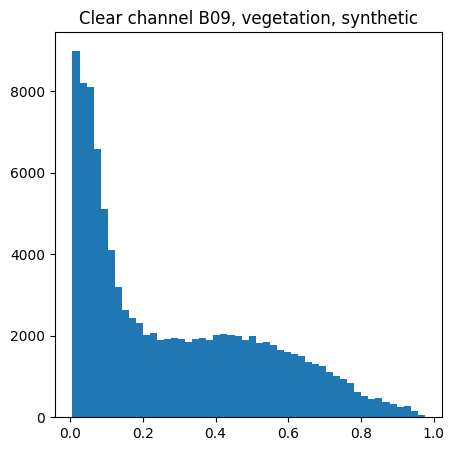

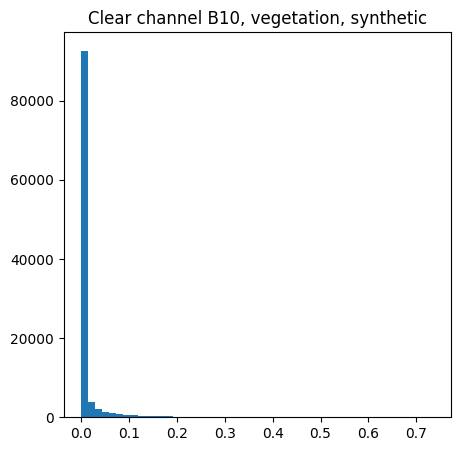

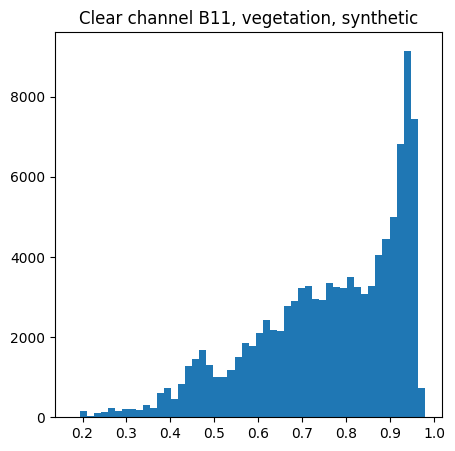

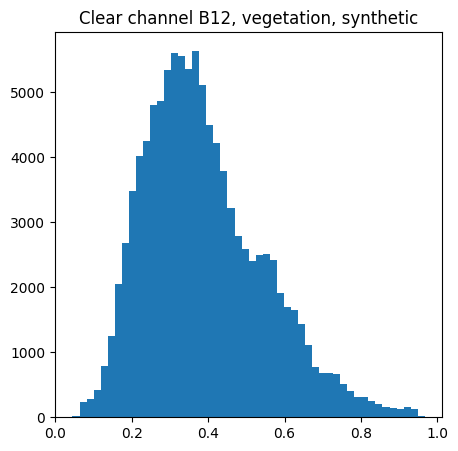

In [ ]:

plt.rcParams["figure.figsize"] = [5, 5]
for i in range(2,14):
    df_tmp=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
    if i<=8:
        plt.hist(df_tmp['Clear_'+'B0'+str(i)],bins=50)
        plt.title('Clear channel B0'+str(i)+', vegetation, synthetic')
    elif i==9:
        plt.hist(df_tmp['Clear_'+'B0'+str(i)],bins=50)
        plt.title('Clear channel B8A, vegetation, synthetic')
    elif i==10:
        plt.hist(df_tmp['Clear_'+'B'+str(i)],bins=50)
        plt.title('Clear channel B09, vegetation, synthetic')
    else:   
        plt.hist(df_tmp['Clear_'+'B'+str(i)],bins=50)
        plt.title('Clear channel B'+str(i-1)+', vegetation, synthetic')
    plt.show()



In [ ]:
tm=data_all[data_all['Surface_Desc_Dumb']=='vegetation']
tm.Clear_B13.value_counts()

Clear_B13
0.31364    11
0.28035    11
0.36714    11
0.31792    11
0.38341    10
           ..
0.29989     1
0.39272     1
0.27136     1
0.63164     1
0.63050     1
Name: count, Length: 48585, dtype: int64

In [ ]:
cloudy_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13']

clear_columns=['Clear_B02','Clear_B03', 'Clear_B04', 
               'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
               'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

channel_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13',
                'Clear_B02','Clear_B03', 'Clear_B04', 
                'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
                'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

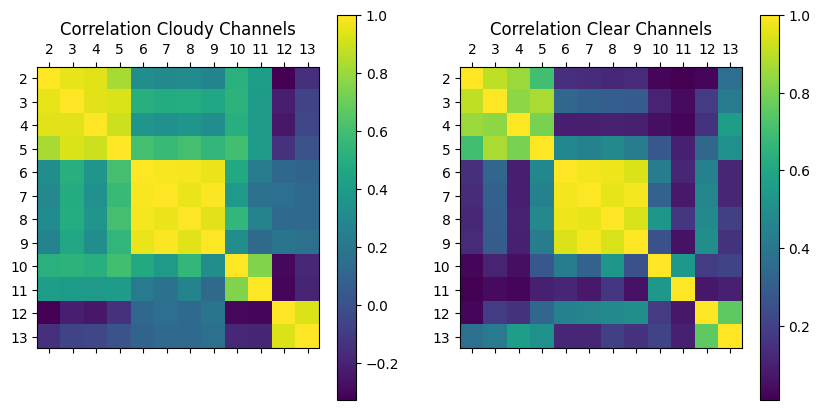

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, (ax1, ax2) = plt.subplots(1,2)
fig_1=ax1.matshow(data_all[cloudy_columns].corr())
fig_2=ax2.matshow(data_all[clear_columns].corr())
fig.colorbar(fig_1,ax=ax1)
fig.colorbar(fig_2,ax=ax2)

#Set titles
ax1.title.set_text('Correlation Cloudy Channels')
ax2.title.set_text('Correlation Clear Channels')

#Set ticks subplot 1
ax1.set_xticks(range(0,12))
ax1.set_yticks(range(0,12))
ax1.set_xticklabels(range(2,14))
ax1.set_yticklabels(range(2,14))

ax2.set_xticks(range(0,12))
ax2.set_yticks(range(0,12))
ax2.set_xticklabels(range(2,14))
ax2.set_yticklabels(range(2,14))

plt.show()

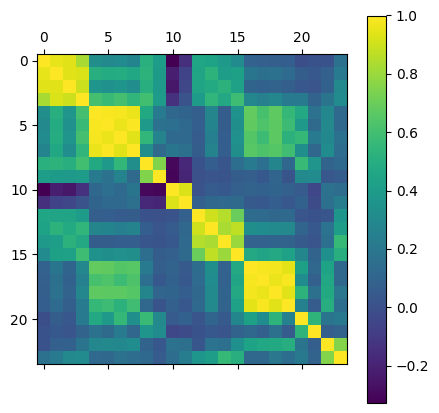

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.matshow(data_all[channel_columns].corr())
plt.colorbar()

## Eigenvalue decomposition

In [ ]:
cloudy_cov=data_all[cloudy_columns].corr()
[U,S,V]=np.linalg.svd(cloudy_cov)

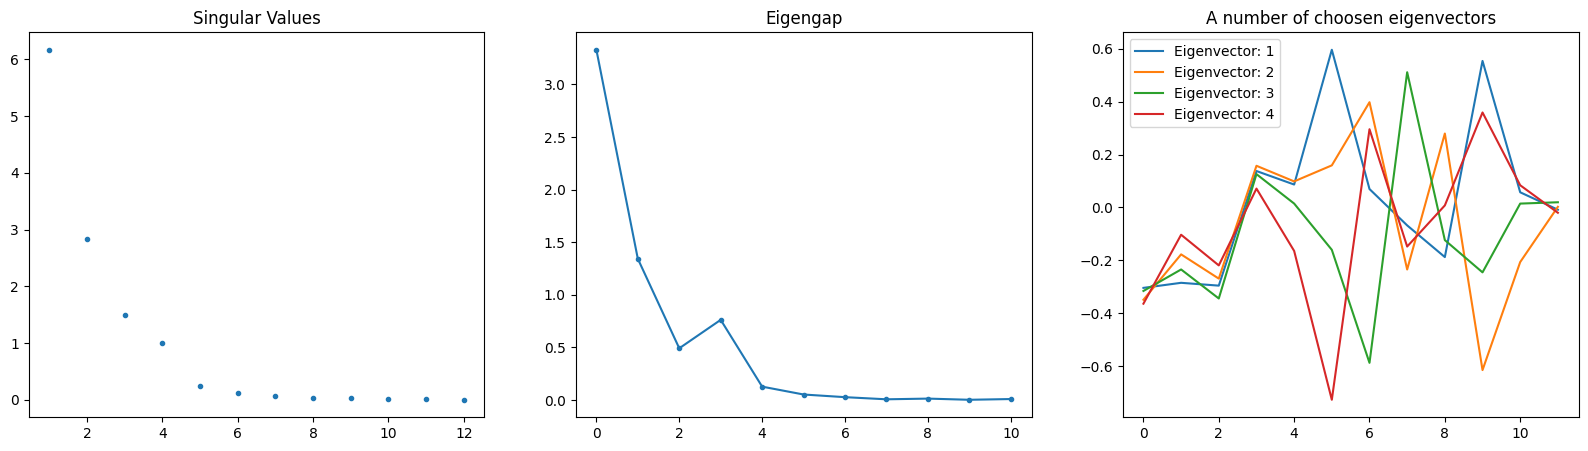

In [ ]:
x=[i+1 for i in range(12)]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,S,'.')
ax1.title.set_text('Singular Values')


ax2.plot(S[0:-1]-S[1:],'.-')
ax2.title.set_text('Eigengap')

num_eigenvecs=4
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()

### Seems to be a large gap between singular values 4 and 5. Do we then have about 4 independent channels?

## PCA

In [ ]:
input_output_variables=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
                        'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
                        'Cloud_B12', 'Cloud_B13', 'Sat_Zenith_Angle',
                        'Sun_Zenith_Angle', 'Azimuth_Diff_Angle',
                        'Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
                        'Clear_B07','Clear_B08','Clear_B09','Clear_B10','Clear_B11',
                        'Clear_B12','Clear_B13']
input_variables=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
                        'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
                        'Cloud_B12', 'Cloud_B13', 'Sat_Zenith_Angle',
                        'Sun_Zenith_Angle', 'Azimuth_Diff_Angle']

variables=input_variables
X=data_all[variables].copy()
co=np.dot(X.T,X)
eigvals,eigvecs=np.linalg.eig(co)
e_indices = np.argsort(eigvals)[::-1]
eigvecs_sort=np.real(eigvecs[:,e_indices])
eigvals_sort=np.real(eigvals[e_indices])

In [ ]:
explained_variance=[]
for i in eigvals:
    explained_variance.append((i/sum(eigvals)))

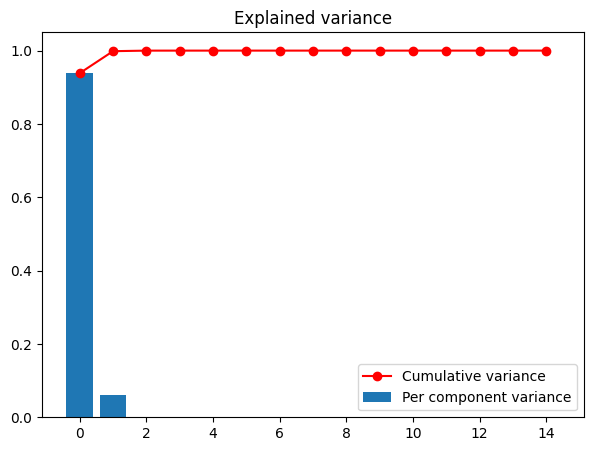

In [ ]:
num=len(variables)
plt.rcParams["figure.figsize"] = [7, 5]
plt.bar(range(np.size(explained_variance[0:num])),height=explained_variance[0:num])
plt.plot(np.cumsum(explained_variance),'ro-')
plt.title('Explained variance')
plt.xticks(range(0,len(variables),2))
plt.legend(['Cumulative variance','Per component variance'])
plt.show()

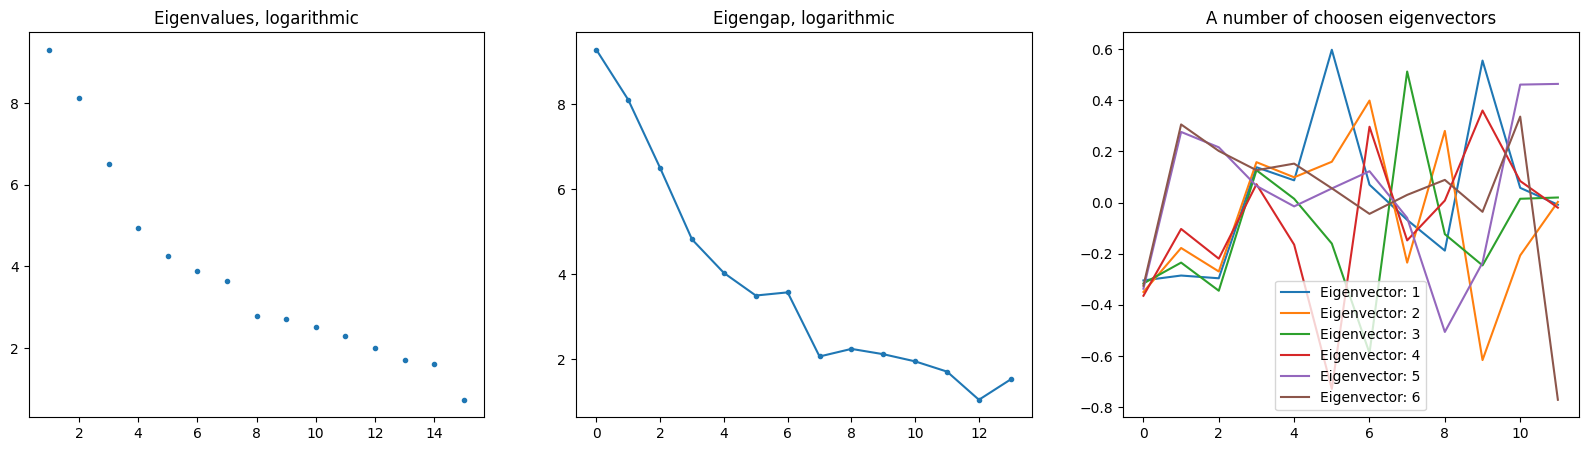

In [ ]:
x=[i+1 for i in range(len(eigvals_sort))]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,np.log10(eigvals_sort),'.')
ax1.title.set_text('Eigenvalues, logarithmic')


ax2.plot(np.log10(eigvals_sort[0:-1]-eigvals_sort[1:]),'.-')
ax2.title.set_text('Eigengap, logarithmic')

num_eigenvecs=6
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()